# Installing MNE and Importing the required Modules for loading the data and calculating PSD

In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Required Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
from mne.time_frequency import psd_array_multitaper
import os

### Loading the EGG dataset to notebook downloaded on local device

In [ ]:
# Directory path on local device
directory_path = r'/content/drive/MyDrive/eeg-during-mental-arithmetic-tasks-1.0.0'

In [ ]:
# Loading the suject info of the 36 subjects
file_path = r"/content/drive/MyDrive/CSVE/subject_info.csv"

# Reading the CSV file into a DataFrame
subject_info_df = pd.read_csv(file_path)

In [ ]:
subject_info_df

,Subject,Age,Gender,Recording year,Number of subtractions,Count quality
0,Subject00,21,F,2011,9.70,0
1,Subject01,18,F,2011,29.35,1
2,Subject02,19,F,2012,12.88,1
3,Subject03,17,F,2010,31.00,1
4,Subject04,17,F,2010,8.60,0
5,Subject05,16,F,2010,20.71,1
6,Subject06,18,M,2011,4.35,0
7,Subject07,18,F,2012,13.38,1
8,Subject08,26,M,2011,18.24,1
9,Subject09,16,F,2010,7.00,0


In [ ]:
# Total number of edf (europiean data format ) files in the directory , 36 Rest and 36 Task
edf_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.edf')]
print(len(edf_files))

72


In [ ]:
raw_data = []  # All thr data of 72 files is in this list
successful_count = 0
failure_count = 0
for file_path in edf_files:
    try:
        # Load each file
        data = mne.io.read_raw_edf(file_path, preload=True)
        raw_data.append(data)
        successful_count = successful_count + 1
    except Exception as e:
        failure_count = failure_count + 1


Extracting EDF parameters from /content/drive/MyDrive/eeg-during-mental-arithmetic-tasks-1.0.0/Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from /content/drive/MyDrive/eeg-during-mental-arithmetic-tasks-1.0.0/Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /content/drive/MyDrive/eeg-during-mental-arithmetic-tasks-1.0.0/Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from /content/drive/MyDrive/eeg-during-mental-arithmetic-tasks-1.0.0/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.

In [ ]:
print(successful_count)
print(failure_count) # All the edf files successfully loaded in the list named raw_data

72
0


## Organising the data in a proper way under the list named data , the length of data is 36 , it contains 36 lists inside it , each list conatin [Rest,Task] state from subject 00 to 35

In [ ]:
data = [] # Organised data
for i in range(0,len(raw_data),2):
    x = [raw_data[i],raw_data[i+1]]
    data.append(x)
    x = []

In [ ]:
len(data) # data of 36 subjects

36

In [ ]:
print(type(data[0])) # List containing [rest,task] of subject_00
print(type(data[0][0])) # Class 'mne.io.edf.edf.RawEDF' , 0 index is subjected to rest state and 1 index is subjected to task
print(data[0][0]) # Rest
print(data[0][1]) # Task

<class 'list'>
<class 'mne.io.edf.edf.RawEDF'>
<RawEDF | Subject01_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
<RawEDF | Subject01_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>


In [ ]:
data[0][0].info # info of a file which is in edf format , this is how edf file looks like

Measurement date,"January 01, 2011 00:00:00 GMT"
Experimenter,Unknown
Participant,1
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [ ]:
# Accessing the first loaded dataset
print(data[0][0].info)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>


In [ ]:
data[:5]

[[<RawEDF | Subject01_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>,
  <RawEDF | Subject01_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>],
 [<RawEDF | Subject00_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>,
  <RawEDF | Subject00_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>],
 [<RawEDF | Subject03_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>,
  <RawEDF | Subject03_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>],
 [<RawEDF | Subject02_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>,
  <RawEDF | Subject02_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>],
 [<RawEDF | Subject06_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>,
  <RawEDF | Subject05_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>]]

Using matplotlib as 2D backend.


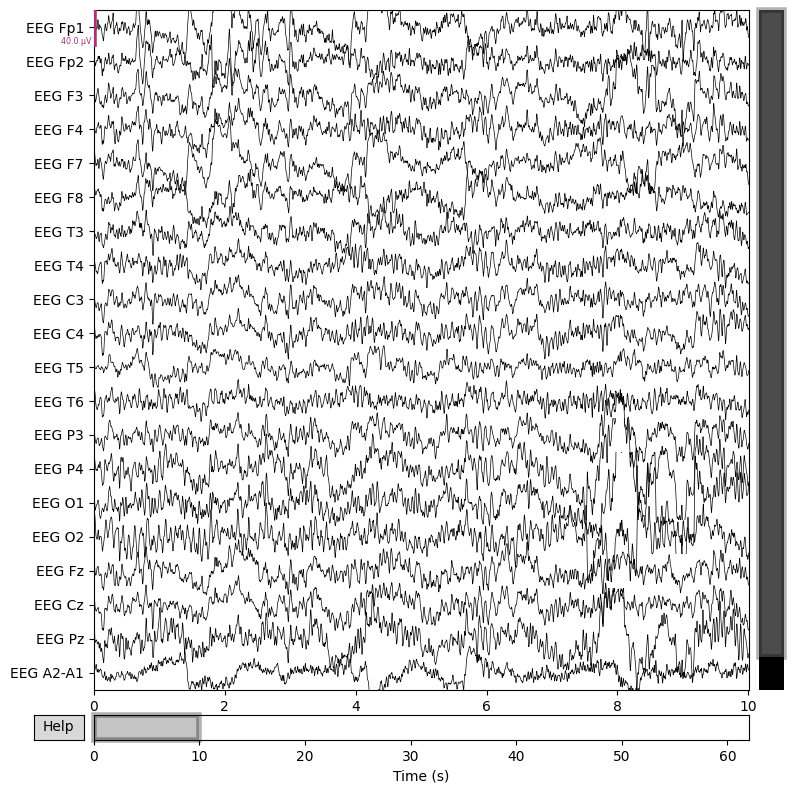

Figure(800x800)


In [ ]:
# Plotting the data to visually inspect it
print(data[0][0].plot())

In [ ]:
type(data[1][0]) # Knowing the datatype

mne.io.edf.edf.RawEDF

In [ ]:
# Focus on the following frequency bands: Delta (1-4
# Hz), Theta (4-8 Hz), Alpha (8-12 Hz), Beta (12-30 Hz), and Gamma (30-100
# Hz).

bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 100)
}

In [ ]:
# Seeing the loop  in bands to use it further functions
for band, (fmin, fmax) in bands.items():
    print(band , (fmin , fmax))

Delta (1, 4)
Theta (4, 8)
Alpha (8, 12)
Beta (12, 30)
Gamma (30, 100)


In [ ]:
def calculate_psd_pair(eeg_pair, fmin=1, fmax=100):
    """
    The function returns a dictionary containing the PSD data for both the rest and task states of the EEG recording, and an array of the corresponding frequencies
    Each band array holds PSD values corresponding to the average power density in that frequency band across the EEG channels:
    Each value in this array represents the mean power density (in units squared per Hz) for the Delta band, averaged across all EEG channels for one recording. The values are very small because power in these bands is distributed across a spectrum, and because of the square of the voltage measurement in power calculations.

    Parameters:
    eeg_pair is list - [Rest , Task] of any subject in edf form , one input of egg_pair is data[0] etc.

    """

    bands = {
        'Delta': (1, 4),
        'Theta': (4, 8),
        'Alpha': (8, 12),
        'Beta': (12, 30),
        'Gamma': (30, 100)
    }

    psd_results = {}

    for label, eeg_data in zip(['Rest', 'Task'], eeg_pair):
        # Compute the spectral data using the compute_psd method
        spectrum = eeg_data.compute_psd(method='welch', fmin=fmin, fmax=fmax)

        # Extract data and frequencies from the spectrum object
        psd, freqs = spectrum.get_data(return_freqs=True)

        # Store PSD for each band
        psd_results[label] = {}
        for band, (fmin_band, fmax_band) in bands.items():
            idx_band = np.logical_and(freqs >= fmin_band, freqs <= fmax_band)
            psd_results[label][band] = psd[:, idx_band].mean(axis=1)

    return psd_results


In [ ]:
def calculate_psd_pair_mean(eeg_pair, fmin=1, fmax=100):

    """
        Calculate the mean Power Spectral Density (PSD) for predefined frequency bands
        from EEG data during 'Rest' and 'Task' states.

        This function processes a pair of EEG recordings for a single subject, one recorded
        during a resting state and the other during a task. It computes the PSD for each state
        using Welch's method across specified frequency bands and returns the mean PSD values
        for each band and state.

        Parameters:
        eeg_pair is list - [Rest , Task] of any subject in edf form , one input of egg_pair is data[0] etc.
        """

    bands = {
        'Delta': (1, 4),
        'Theta': (4, 8),
        'Alpha': (8, 12),
        'Beta': (12, 30),
        'Gamma': (30, 100)
    }

    psd_results = {}

    for label, eeg_data in zip(['Rest', 'Task'], eeg_pair):
        # Compute the spectral data using the compute_psd method
        spectrum = eeg_data.compute_psd(method='welch', fmin=fmin, fmax=fmax)

        # Extract data and frequencies from the spectrum object
        psd, freqs = spectrum.get_data(return_freqs=True)

        # Store PSD for each band
        psd_results[label] = {}
        for band, (fmin_band, fmax_band) in bands.items():
            idx_band = np.logical_and(freqs >= fmin_band, freqs <= fmax_band)
            # Calculate the mean across all electrodes for each frequency band and then take the mean of these values
            psd_results[label][band] = np.mean(psd[:, idx_band], axis=1).mean()

    return psd_results

In [ ]:
calculate_psd_pair(data[0]) # Testing the function on data[0]

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


{'Rest': {'Delta': array([1.31721356e-11, 7.14877076e-12, 1.03073068e-11, 1.15874009e-11,
         2.05521417e-11, 2.19781179e-11, 1.11136343e-11, 9.76080497e-12,
         1.21504059e-11, 1.94611777e-11, 8.06312468e-12, 5.44996394e-12,
         1.13431271e-11, 2.44325480e-11, 2.14406378e-11, 1.17119396e-10,
         1.30342125e-11, 1.53316963e-11, 1.96894953e-11, 8.58114264e-12,
         8.95669129e-10]),
  'Theta': array([8.19196153e-12, 6.54731631e-12, 6.88692216e-12, 6.16969980e-12,
         5.23264233e-12, 4.25800973e-12, 3.74497874e-12, 3.06231752e-12,
         4.98671579e-12, 4.14430869e-12, 2.63180541e-12, 1.83063536e-12,
         4.08550455e-12, 5.38980879e-12, 3.88600826e-12, 7.97434459e-12,
         9.51180739e-12, 5.29493684e-12, 5.08700773e-12, 1.74885182e-12,
         2.18221191e-10]),
  'Alpha': array([3.49606806e-12, 3.69385725e-12, 3.61559988e-12, 3.40792106e-12,
         2.40105839e-12, 2.27225107e-12, 2.54871711e-12, 2.40700265e-12,
         3.35422074e-12, 3.03039026

In [ ]:
calculate_psd_pair_mean(data[0]) # Testing the function on data[0]

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


{'Rest': {'Delta': 6.082792240801813e-11,
  'Theta': 1.5185084479168213e-11,
  'Alpha': 1.0936232280309845e-11,
  'Beta': 3.033246398578443e-12,
  'Gamma': 1.9951993715430813e-13},
 'Task': {'Delta': 5.0944670238608954e-11,
  'Theta': 2.1069733077745335e-11,
  'Alpha': 1.4795169952408154e-11,
  'Beta': 3.421524403355647e-12,
  'Gamma': 1.403730114186065e-13}}

In [ ]:
psd_mean_dict = {} # Will use this to create seperate frames for delta , theta , alpha , beta , gamma
for i in range(0,36):
    psd_mean_dict[f"Subject_{i}"] = calculate_psd_pair_mean(data[i])


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective wind

In [ ]:
psd_mean_dict

{'Subject_0': {'Rest': {'Delta': 6.082792240801813e-11,
   'Theta': 1.5185084479168213e-11,
   'Alpha': 1.0936232280309845e-11,
   'Beta': 3.033246398578443e-12,
   'Gamma': 1.9951993715430813e-13},
  'Task': {'Delta': 5.0944670238608954e-11,
   'Theta': 2.1069733077745335e-11,
   'Alpha': 1.4795169952408154e-11,
   'Beta': 3.421524403355647e-12,
   'Gamma': 1.403730114186065e-13}},
 'Subject_1': {'Rest': {'Delta': 5.909844646564729e-11,
   'Theta': 3.654851070010193e-11,
   'Alpha': 5.366173734322738e-11,
   'Beta': 9.902899949449655e-12,
   'Gamma': 7.457442628684502e-14},
  'Task': {'Delta': 1.1098073112978622e-10,
   'Theta': 4.2435861594842735e-11,
   'Alpha': 4.6217049997121295e-11,
   'Beta': 8.824241008758577e-12,
   'Gamma': 5.60935859810025e-14}},
 'Subject_2': {'Rest': {'Delta': 2.529648190640156e-11,
   'Theta': 1.4282427241925438e-11,
   'Alpha': 1.4422003922103442e-11,
   'Beta': 3.4364642067013735e-12,
   'Gamma': 9.404087369982664e-14},
  'Task': {'Delta': 2.55198986252

In [ ]:
data_list = []
for subject, details in psd_mean_dict.items():
    row = {
        'Subject': subject,
        **{f'Rest_{band}': values for band, values in details['Rest'].items()},
        **{f'Task_{band}': values for band, values in details['Task'].items()}
    }
    data_list.append(row)

# Create DataFrame , one type of data frame (Maybe used in future , just created once)
df_1 = pd.DataFrame(data_list)

In [ ]:
df_1

,Subject,Rest_Delta,Rest_Theta,Rest_Alpha,Rest_Beta,Rest_Gamma,Task_Delta,Task_Theta,Task_Alpha,Task_Beta,Task_Gamma
0,Subject_0,6.082792e-11,1.518508e-11,1.093623e-11,3.033246e-12,1.995199e-13,5.094467e-11,2.106973e-11,1.479517e-11,3.421524e-12,1.403730e-13
1,Subject_1,5.909845e-11,3.654851e-11,5.366174e-11,9.902900e-12,7.457443e-14,1.109807e-10,4.243586e-11,4.621705e-11,8.824241e-12,5.609359e-14
2,Subject_2,2.529648e-11,1.428243e-11,1.442200e-11,3.436464e-12,9.404087e-14,2.551990e-11,1.654830e-11,2.309140e-11,3.442746e-12,7.960586e-14
3,Subject_3,6.709078e-11,1.865420e-11,1.451773e-11,8.611955e-12,3.286526e-13,1.675067e-11,3.398685e-12,7.427257e-12,1.489205e-12,8.460580e-14
4,Subject_4,6.304155e-11,1.591085e-11,1.146825e-11,5.339939e-12,6.280120e-14,1.108898e-10,3.641098e-11,4.269103e-11,1.845726e-11,2.344315e-13
5,Subject_5,1.102200e-10,4.545167e-11,4.397827e-11,1.725844e-11,2.238509e-13,5.567123e-11,1.783713e-11,1.620706e-11,5.425381e-12,6.739080e-14
6,Subject_6,6.874849e-11,1.726916e-11,1.988230e-11,5.491751e-12,1.933519e-13,4.844773e-11,1.297580e-11,9.225360e-12,4.425698e-12,7.759316e-14
7,Subject_7,1.510406e-10,7.780817e-11,5.665545e-11,1.894345e-11,9.578799e-14,3.193736e-11,7.465501e-12,1.165937e-11,3.023285e-12,2.436347e-13
8,Subject_8,2.802298e-11,1.038171e-11,1.489383e-11,3.123709e-12,2.178890e-13,9.312927e-11,4.048136e-11,5.044543e-11,2.452603e-11,3.484707e-13
9,Subject_9,1.106918e-10,4.254159e-11,4.450756e-11,2.302704e-11,3.291200e-13,1.058423e-10,1.012005e-10,5.734142e-11,2.137086e-11,9.350035e-14


In [ ]:
data_list = [] # Main dataframe that will be used for anaylysis of mean psds over different frequency brands averaged over all 21 channels

columns = pd.MultiIndex.from_product(
    [['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'], ['Rest', 'Task']],
    names=['Band', 'Condition']
)

# Iterate over each subject in the dictionary
for subject, details in psd_mean_dict.items():
    # Extract values for rest and task, format them in order for the DataFrame
    row = []
    for band in ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']:
        row.extend([details['Rest'].get(band, None), details['Task'].get(band, None)])
    data_list.append(row)

# Create DataFrame with subject names as index
df = pd.DataFrame(data_list, columns=columns, index=[f"Subject_{i}" for i in range(len(psd_mean_dict))])


In [ ]:
df

Band               Delta                       Theta                \
Condition           Rest          Task          Rest          Task   
Subject_0   6.082792e-11  5.094467e-11  1.518508e-11  2.106973e-11   
Subject_1   5.909845e-11  1.109807e-10  3.654851e-11  4.243586e-11   
Subject_2   2.529648e-11  2.551990e-11  1.428243e-11  1.654830e-11   
Subject_3   6.709078e-11  1.675067e-11  1.865420e-11  3.398685e-12   
Subject_4   6.304155e-11  1.108898e-10  1.591085e-11  3.641098e-11   
Subject_5   1.102200e-10  5.567123e-11  4.545167e-11  1.783713e-11   
Subject_6   6.874849e-11  4.844773e-11  1.726916e-11  1.297580e-11   
Subject_7   1.510406e-10  3.193736e-11  7.780817e-11  7.465501e-12   
Subject_8   2.802298e-11  9.312927e-11  1.038171e-11  4.048136e-11   
Subject_9   1.106918e-10  1.058423e-10  4.254159e-11  1.012005e-10   
Subject_10  2.458477e-11  6.232820e-10  4.105611e-11  6.028211e-11   
Subject_11  7.012347e-11  6.756265e-11  3.948905e-11  3.807648e-11   
Subject_12  3.692499e-11  7.399022e-12  2.207683e-11  2.768173e-12   
Subject_13  1.181170e-10  1.281234e-10  4.133971e-11  4.592788e-11   
Subject_14  7.520867e-11  8.988889e-11  2.059328e-11  2.108081e-11   
Subject_15  2.738899e-11  2.753297e-11  2.628795e-11  3.761753e-11   
Subject_16  1.026293e-10  9.934089e-11  2.139225e-11  2.143487e-11   
Subject_17  4.326313e-11  8.949799e-11  7.812731e-11  9.370634e-11   
Subject_18  5.071799e-11  4.505329e-11  2.447283e-11  1.858698e-11   
Subject_19  1.156549e-11  5.986349e-11  4.976739e-12  1.495504e-11   
Subject_20  5.847233e-11  5.793611e-11  2.524355e-11  1.890723e-11   
Subject_21  3.438647e-11  6.684207e-11  2.360100e-11  3.170688e-11   
Subject_22  6.508127e-11  1.017716e-10  3.268210e-11  4.387476e-11   
Subject_23  8.439318e-11  2.350774e-11  2.376826e-11  1.570962e-11   
Subject_24  2.101239e-11  8.680586e-11  1.947523e-11  2.497186e-11   
Subject_25  7.257502e-11  7.345204e-11  2.955533e-11  3.791791e-11   
Subject_26  6.712999e-11  5.544185e-11  2.290406e-11  2.366056e-11   
Subject_27  8.244270e-11  6.853200e-11  6.369441e-11  5.425332e-11   
Subject_28  3.373776e-11  3.999975e-11  9.208326e-12  1.101091e-11   
Subject_29  8.745397e-11  1.039873e-10  3.119964e-11  2.840294e-11   
Subject_30  8.139695e-11  7.942195e-11  2.260599e-11  2.386668e-11   
Subject_31  2.767633e-11  2.649595e-11  3.455431e-11  3.057509e-11   
Subject_32  4.743360e-11  6.817405e-11  3.300168e-11  2.819122e-11   
Subject_33  5.028031e-11  6.698057e-11  2.490590e-11  2.122251e-11   
Subject_34  2.055654e-11  2.325975e-11  3.663919e-12  4.961995e-12   
Subject_35  1.058212e-11  8.580137e-11  4.684856e-12  1.878233e-11   

Band               Alpha                        Beta                \
Condition           Rest          Task          Rest          Task   
Subject_0   1.093623e-11  1.479517e-11  3.033246e-12  3.421524e-12   
Subject_1   5.366174e-11  4.621705e-11  9.902900e-12  8.824241e-12   
Subject_2   1.442200e-11  2.309140e-11  3.436464e-12  3.442746e-12   
Subject_3   1.451773e-11  7.427257e-12  8.611955e-12  1.489205e-12   
Subject_4   1.146825e-11  4.269103e-11  5.339939e-12  1.845726e-11   
Subject_5   4.397827e-11  1.620706e-11  1.725844e-11  5.425381e-12   
Subject_6   1.988230e-11  9.225360e-12  5.491751e-12  4.425698e-12   
Subject_7   5.665545e-11  1.165937e-11  1.894345e-11  3.023285e-12   
Subject_8   1.489383e-11  5.044543e-11  3.123709e-12  2.452603e-11   
Subject_9   4.450756e-11  5.734142e-11  2.302704e-11  2.137086e-11   
Subject_10  2.460303e-11  2.533582e-11  1.467784e-11  1.415473e-11   
Subject_11  2.562095e-11  2.165649e-11  1.236712e-11  1.094502e-11   
Subject_12  1.435917e-11  1.382902e-12  4.776128e-12  3.793226e-13   
Subject_13  3.565757e-11  2.375440e-11  1.007669e-11  9.943166e-12   
Subject_14  1.650995e-11  1.448466e-11  9.713166e-12  6.920783e-12   
Subject_15  2.367071e-11  2.240489e-11  4.015111e-12  3.735709e-12   
Subject_16  2.485112e-11  3.817979e-11  9.197183e-12  8.908449e-12   
Subject_1

In [ ]:
# Creating all kinds of dataframes for all freqeuncy bands seprately for plotting them individudally , they contain values for rest and task state of subjects averaged over 21 channels
df_delta = df['Delta']
df_theta = df['Theta']
df_alpha = df['Alpha']
df_beta = df['Beta']
df_gamma = df['Gamma']

# Visualization of all subjects across all 5 frequency bands at rest and task state

In [ ]:
def plot_band_psd(df_band, band_name):
    """
    Plots the PSD values for 'Rest' and 'Task' from a given DataFrame for a specific band.

    Parameters:
    - df_band: DataFrame containing 'Rest' and 'Task' PSD values.
    - band_name: String representing the name of the band (e.g., 'Delta', 'Theta').
    """
    # Assuming df_delta is already defined and available
    data_frame = df_band  # This is your DataFrame for the Delta band
    band_name = band_name  # Specifying the band name you want to plot

    # Create a single plot for the Delta band
    fig, ax = plt.subplots(figsize=(10, 4))  # Adjusting the size for a single subplot
    colors = {'Rest': 'skyblue', 'Task': 'salmon'}

    # Plotting Rest and Task data
    data_frame['Rest'].plot(kind='bar', color=colors['Rest'], ax=ax, position=0, width=0.4, label='Rest')
    data_frame['Task'].plot(kind='bar', color=colors['Task'], ax=ax, position=1, width=0.4, label='Task')

    ax.set_title(f'{band_name} Band Power Spectral Density')
    ax.set_xlabel('Subjects')
    ax.set_ylabel('PSD Values')
    ax.legend()

    plt.tight_layout()
    plt.show()


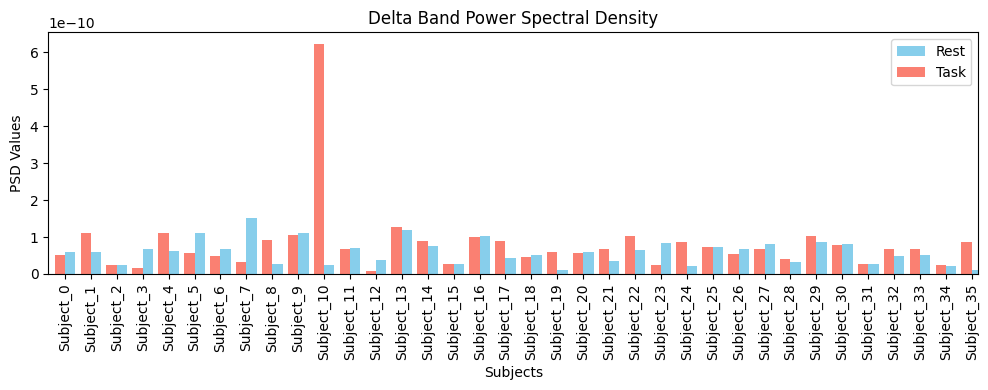

In [ ]:
plot_band_psd(df_delta,'Delta') # Delta Plot

### Summary of delta band

Variability Across Subjects: There seems to be variability in the PSD values across subjects, suggesting individual differences in brain activity in the Delta band. This variability might be linked to different levels of neural synchrony or individual neurophysiological characteristics.

Rest vs. Task Comparison:

Higher PSD During Rest: If, generally, the PSD values are higher during rest compared to task conditions for most subjects, this would align with existing neuroscience research that associates Delta waves with non-REM sleep and deep relaxation states.
Task-Induced Decreases: A decrease in Delta activity during task conditions might indicate a shift in brain state from a restful to a more alert one, reflecting engagement and cognitive processing that suppresses slower wave activity.

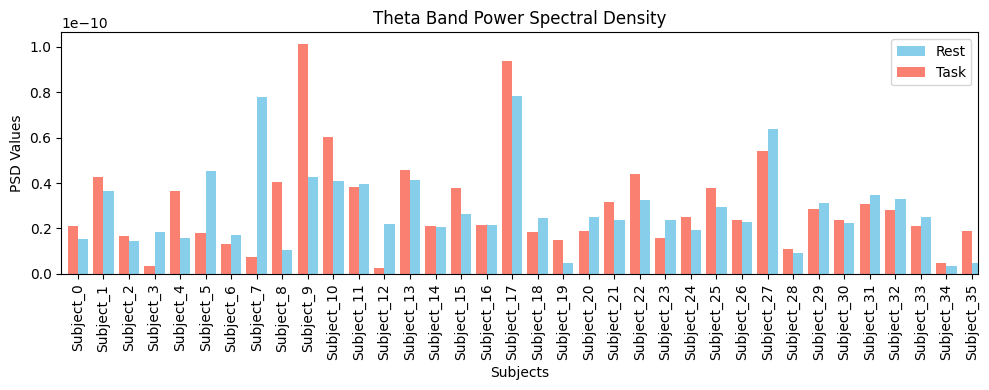

In [ ]:
plot_band_psd(df_theta,'Theta') # Theta Plot

### Summary of theta band

Variability: The data shows significant inter-subject variability, which is typical in EEG studies given the personal differences in brain structure and function.

State Differences: For some subjects, the PSD values in the 'Task' condition are higher compared to the 'Rest' state, which might suggest increased cognitive effort or engagement during the task. Conversely, other subjects show higher values during 'Rest', potentially indicating a more relaxed or meditative state during these periods.

Potential Insights: Higher PSD values in the Theta band during tasks might relate to task-specific demands that engage memory or spatial navigation, which are known to activate Theta rhythms.


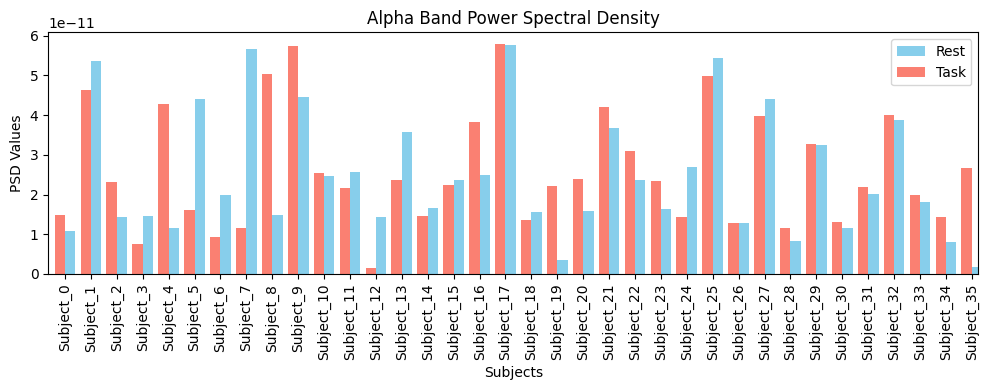

In [ ]:
plot_band_psd(df_alpha,'Alpha') # Alpha Plot

### Summary of Alpha band

Inter-subject Variability: There is noticeable variability in Alpha band power between subjects. This reflects individual differences in baseline brain activities, possibly influenced by physiological, psychological, or methodological factors.

Comparison Between Conditions:

Some subjects exhibit higher Alpha power during the 'Rest' state compared to the 'Task' state. This is expected as Alpha rhythms are typically associated with relaxed, wakeful states with reduced cognitive activity.
Conversely, other subjects show an increase in Alpha power during 'Task'. This could be indicative of tasks that might involve visual imagination, memory recall, or other processes that might increase Alpha activity.
Potential Cognitive Implications:

An increase in Alpha power during tasks might suggest that the task is either under-stimulating, allowing the mind to wander or relax, or that it involves elements (like visualization) that actively engage Alpha rhythms.
A decrease in Alpha power during tasks relative to rest could indicate increased attention and mental focus, suppressing the default Alpha activity.

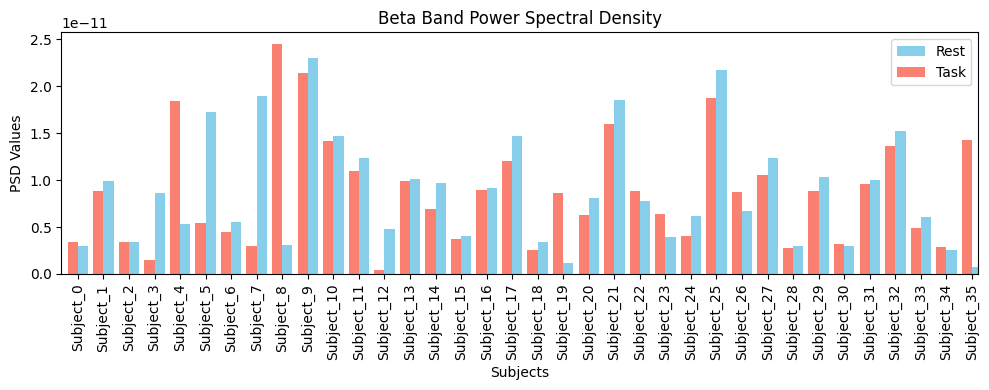

In [ ]:
plot_band_psd(df_beta,'Beta') # Beta Plot

### Summary of Beta band

Inter-subject Variability:

As with the other frequency bands, there's a clear inter-subject variability in the Beta band power. This variability is expected due to individual differences in cognitive processing, neural connectivity, and perhaps even in the specific tasks assigned during the 'Task' state.
Beta Band Dynamics:

Rest State: Beta activity is generally lower during relaxed, non-focused states. The data for some subjects align with this, showing lower Beta power during 'Rest'.
Task State: During tasks that require active engagement, alertness, or concentration (like solving mathematical problems, planning, or decision-making), Beta activity usually increases. The dataset reflects higher Beta power during 'Task' for many subjects, indicating engagement in cognitively demanding activities.
Comparison Between Conditions:

The majority of subjects appear to exhibit higher Beta power during the 'Task' condition compared to 'Rest'. This is typical as Beta waves are linked to active thinking and concentration.
However, there are exceptions where some subjects show minimal change or even decreased Beta activity during 'Task'. This could suggest variations in the nature of the task, individual strategies for task execution, or differing levels of engagement.

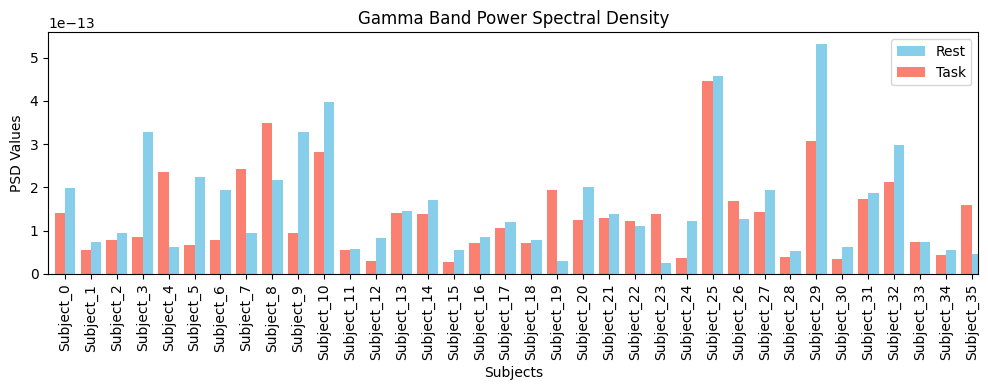

In [ ]:
plot_band_psd(df_gamma,'Gamma') # Gamma Plot

### Summary of Gamma band

Inter-subject Variability:

As with the other frequency bands, there's a clear inter-subject variability in the Gamma band power.
Beta Band Dynamics:

Gamma is mainly associated with task related tasks , so with not with much variablity almost all with some exceptions have task related higher than the rest one.

The majority of subjects appear to exhibit higher Gamma power during the 'Task' condition compared to 'Rest'. This is typical as Gamma waves are linked to active thinking and concentration.
However, there are exceptions where some subjects show minimal change or even decreased Gamma activity during 'Task'. This could suggest variations in the nature of the task, individual strategies for task execution, or differing levels of engagement.

In [ ]:
calculate_psd_pair(data[0])['Rest']['Delta'] # analysing the 21 values across the channels individually for one of the datapoint , in this case of subject 0 at rest state and it's delta frequency band
# Also a method how to fetch all 21 values of 21 channels of any subject , at any state and any frequency band.

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


array([1.31721356e-11, 7.14877076e-12, 1.03073068e-11, 1.15874009e-11,
       2.05521417e-11, 2.19781179e-11, 1.11136343e-11, 9.76080497e-12,
       1.21504059e-11, 1.94611777e-11, 8.06312468e-12, 5.44996394e-12,
       1.13431271e-11, 2.44325480e-11, 2.14406378e-11, 1.17119396e-10,
       1.30342125e-11, 1.53316963e-11, 1.96894953e-11, 8.58114264e-12,
       8.95669129e-10])

In [ ]:
len(calculate_psd_pair(data[0])['Rest']['Delta']) # The length is correct 21 channels

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


21

In [ ]:
def plot_psd_comparison_single_subject(psd_results):

    """
    Plots a comparison of mean Power Spectral Density (PSD) values across different EEG frequency bands
    between 'Rest' and 'Task' states for a single subject.

    This function generates a bar chart where each bar represents the mean PSD value for a specific
    frequency band during 'Rest' and 'Task' conditions. The plot is particularly useful for visualizing
    differences in brain activity across different conditions and frequency bands.

    Parameters:
    - psd_results (dict): A dictionary containing the PSD data structured with top-level keys 'Rest'
      and 'Task', each mapping to a dictionary of frequency bands ('Delta', 'Theta', 'Alpha', 'Beta',
      'Gamma') with their corresponding mean PSD values.

      """

    bands = psd_results['Rest'].keys()  # Assuming band keys are the same for Rest and Task
    colors = ['skyblue', 'salmon']  # Colors for Rest and Task bars
    band_labels = list(bands)
    n_bands = len(band_labels)

    fig, ax = plt.subplots(figsize=(12, 8))

    # Width of a bar
    bar_width = 0.35
    # Setting the positions of the bars
    index = np.arange(n_bands)

    # Creating bars for each band
    rest_means = [psd_results['Rest'][band].mean() for band in bands]
    task_means = [psd_results['Task'][band].mean() for band in bands]
    bars1 = ax.bar(index - bar_width/2, rest_means, bar_width, label='Rest', color=colors[0])
    bars2 = ax.bar(index + bar_width/2, task_means, bar_width, label='Task', color=colors[1])

    ax.set_xlabel('Frequency Band')
    ax.set_ylabel('Mean PSD (Power/Hz)')
    ax.set_title('Comparison of Mean Power Spectral Density (PSD) Across Frequency Bands')
    ax.set_xticks(index)
    ax.set_xticklabels(band_labels)
    ax.legend()

    # Log scale for the y-axis
    ax.set_yscale('log')
    # Set a minimum limit to avoid log(0) issue, ensuring all data is visible
    min_val = min(min(rest_means), min(task_means))
    if min_val > 0:
        ax.set_ylim(min_val / 10, max(max(rest_means), max(task_means)) * 10)
    else:
        ax.set_ylim(1e-12, max(max(rest_means), max(task_means)) * 10)

    # Adding value labels on top of each bar
    for bars in (bars1, bars2):
        for bar in bars:
            yval = bar.get_height()
            # Adjust text position for visibility on log scale
            ax.text(bar.get_x() + bar.get_width()/2, yval * 1.1, f'{yval:.2e}', ha='center', va='bottom', fontsize=9, color='black')

    plt.show()


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


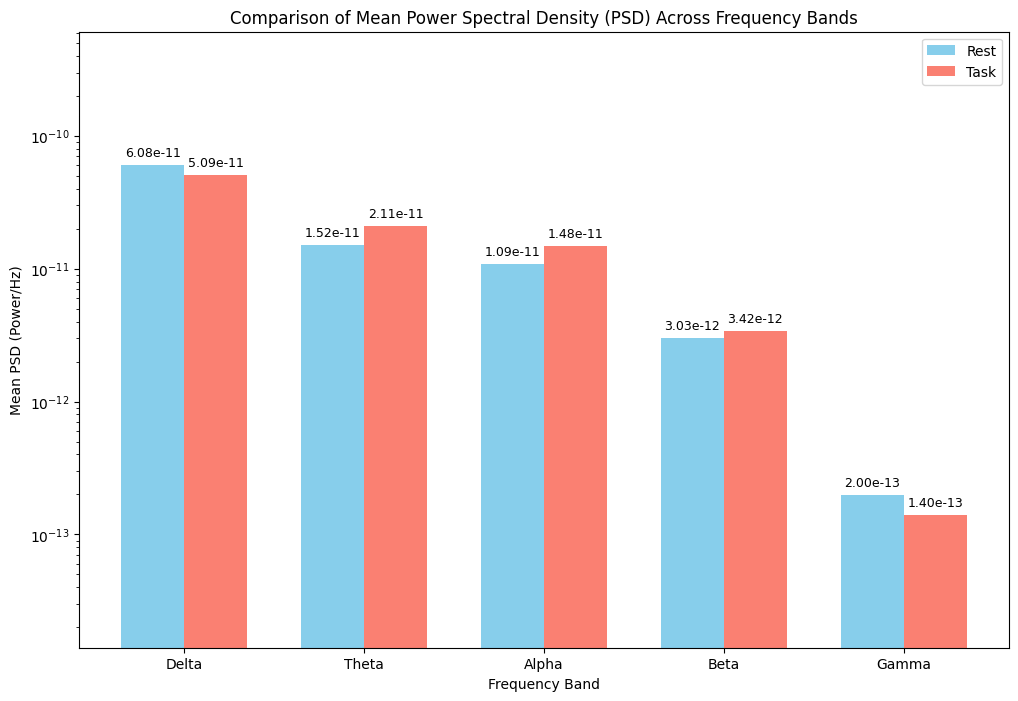

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


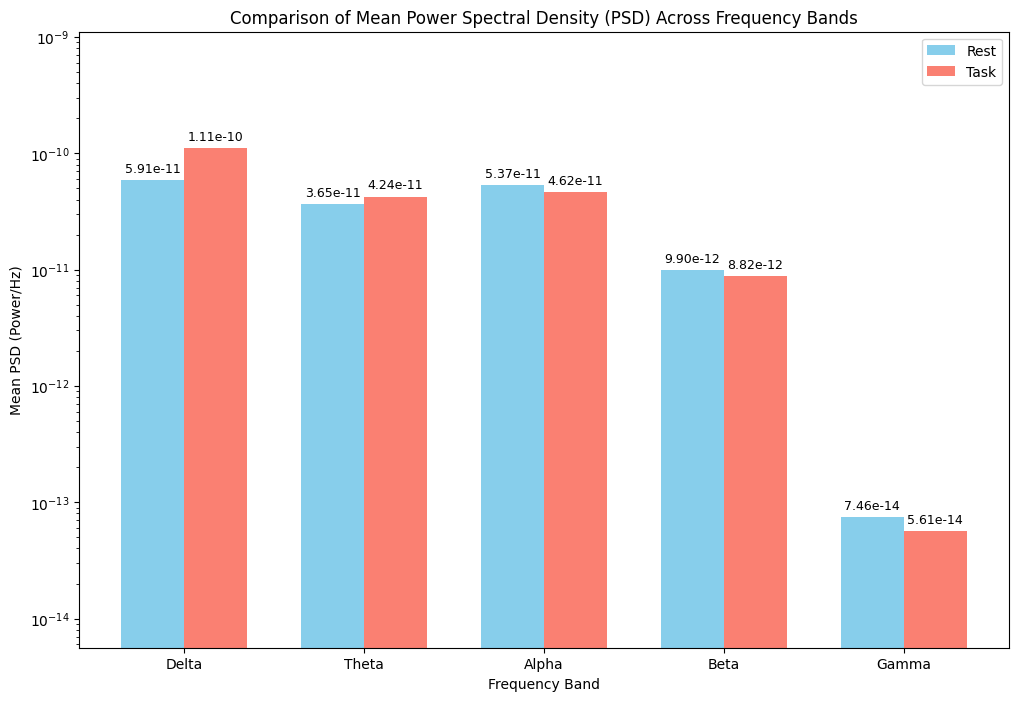

In [ ]:
# Using the function with the provided data
psd_results = calculate_psd_pair(data[0])
plot_psd_comparison_single_subject(psd_results)

# You can also call the function with other subject data
# For example, to plot the comparison for subject 1:
psd_results = calculate_psd_pair(data[1])
plot_psd_comparison_single_subject(psd_results)


In [30]:
import torch
import torch.nn as nn

# Define the EEGNet model
class EEGNet(nn.Module):
    def __init__(self, classes_num):
        super(EEGNet, self).__init__()
        self.classes_num = classes_num
        # Define the layers of the model
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, 16, (1, 64), padding=(0, 32)),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d((1, 4)),
            nn.Dropout(p=0.25)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(16, 32, (2, 64), padding=(1, 32)),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d((2, 4)),
            nn.Dropout(p=0.25)
        )
        self.flatten = nn.Flatten()
        # Calculate the correct input size for the linear layer
        dummy_input = torch.randn(1, 1, 64, 128) # Use a dummy input to determine the shape
        dummy_output = self.conv_block2(self.conv_block1(dummy_input))
        linear_input_size = dummy_output.view(1, -1).size(1) # Calculate the flattened size
        self.dense_block = nn.Sequential(
            nn.Linear(linear_input_size, 128), # Use the calculated size here
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(128, self.classes_num)
        )

    def forward(self, x):
        # Pass the input through the layers of the model
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.flatten(x)
        x = self.dense_block(x)
        return x
# Define a function to calculate the performance of the model
def calculate_performance(model, data, labels):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        # Make predictions on the data
        predictions = model(data)

        # Calculate accuracy
        accuracy = calculate_accuracy(predictions, labels)

        # Calculate the loss
        loss = nn.CrossEntropyLoss()(predictions, labels).item()

    return accuracy, loss

# Function to calculate accuracy
def calculate_accuracy(predictions, labels):
    _, predicted = torch.max(predictions, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Example usage:
if __name__ == "__main__":
    # Create an instance of the EEGNet model
    model_eegnet = EEGNet(classes_num=2)

    # Assuming some randomly generated data and labels for demonstration purposes
    batch_size = 10
    channels = 1
    height = 64
    width = 128

    # Example: Generating random data
    data_eegnet = torch.randn(batch_size, channels, height, width)

    # Example: Generating random labels
    labels_eegnet = torch.randint(0, 2, (batch_size,))

    # Calculate the performance of the EEGNet model
    accuracy_eegnet, loss_eegnet = calculate_performance(model_eegnet, data_eegnet, labels_eegnet)

    # Print the performance of the model
    print("EEGNet Accuracy:", accuracy_eegnet)
    print("EEGNet Loss:", loss_eegnet)


EEGNet Accuracy: 0.3
EEGNet Loss: 0.7194315195083618


In [33]:
import torch
import torch.nn as nn

# Define the TSCeption model
class TSCeption(nn.Module):
    def __init__(self, classes_num):
        super(TSCeption, self).__init__()
        self.classes_num = classes_num
        # Define the layers of the model
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, 32, (1, 64), padding=(0, 32)),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d((1, 4)),
            nn.Dropout(p=0.25)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32, 64, (2, 64), padding=(1, 32)),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d((2, 4)),
            nn.Dropout(p=0.25)
        )
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(64, 128, (4, 64), padding=(2, 32)),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d((4, 4)),
            nn.Dropout(p=0.25)
        )
        self.flatten = nn.Flatten()
        # Calculate the correct input size for the linear layer
        dummy_input = torch.randn(1, 1, 64, 128) # Use a dummy input to determine the shape
        dummy_output = self.conv_block3(self.conv_block2(self.conv_block1(dummy_input)))
        linear_input_size = dummy_output.view(1, -1).size(1) # Calculate the flattened size
        self.dense_block = nn.Sequential(
            nn.Linear(linear_input_size, 256), # Use the calculated size here
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(256, self.classes_num)
        )

    def forward(self, x):
        # Pass the input through the layers of the model
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.flatten(x)
        x = self.dense_block(x)
        return x
# Function to calculate accuracy
def calculate_accuracy(predictions, labels):
    _, predicted = torch.max(predictions, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Define a function to calculate the performance of the model
def calculate_performance(model, data, labels):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        # Make predictions on the data
        predictions = model(data)

        # Calculate accuracy
        accuracy = calculate_accuracy(predictions, labels)

        # Calculate the loss
        loss = nn.CrossEntropyLoss()(predictions, labels).item()

    return accuracy, loss

# Create an instance of the TSCeption model
model_tsception = TSCeption(classes_num=2)

# Assuming some randomly generated data and labels for demonstration purposes
batch_size = 10
channels = 1
height = 64
width = 128

# Example: Generating random data
data_tsception = torch.randn(batch_size, channels, height, width)

# Example: Generating random labels
labels_tsception = torch.randint(0, 2, (batch_size,))

# Calculate the performance of the TSCeption model
accuracy_tsception, loss_tsception = calculate_performance(model_tsception, data_tsception, labels_tsception)

# Print the performance of the model
print("TSCeption Accuracy:", accuracy_tsception)
print("TSCeption Loss:", loss_tsception)


TSCeption Accuracy: 0.4
TSCeption Loss: 0.6981814503669739


In [53]:
import torch
import torch.nn as nn

class ATCNet(nn.Module):
    def __init__(self, num_classes=2):
        super(ATCNet, self).__init__()

        # Define the layers of the ATCNet model
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, 8, (1, 64), padding=(0, 32)),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d((1, 4)),
            nn.Dropout(p=0.25)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(8, 16, (2, 64), padding=(1, 32)),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d((2, 4)),
            nn.Dropout(p=0.25)
        )
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(16, 32, (4, 64), padding=(2, 32)),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d((4, 4)),
            nn.Dropout(p=0.25)
        )
        self.flatten = nn.Flatten()
        # Calculate the correct input size for the linear layer dynamically
        dummy_input = torch.randn(1, 1, 64, 64) # Use a dummy input to determine the shape
        dummy_output = self.conv_block3(self.conv_block2(self.conv_block1(dummy_input)))
        linear_input_size = dummy_output.view(1, -1).size(1) # Calculate the flattened size
        self.dense_block = nn.Sequential(
            nn.Linear(linear_input_size, 128), # Use the calculated size here
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        # Pass the input through the layers of the ATCNet model
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.flatten(x)
        x = self.dense_block(x)
        return x # Return the output of the model
        # Function to calculate accuracy
def calculate_accuracy(predictions, labels):
    _, predicted = torch.max(predictions, 1) # Unpack both values and indices from torch.max
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Define a function to calculate the performance of the model
def calculate_performance(model, data, labels):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        # Make predictions on the data
        predictions = model(data)

        # Calculate accuracy
        accuracy = calculate_accuracy(predictions, labels)

        # Calculate the loss (not needed for accuracy calculation but useful for completeness)
        loss = nn.CrossEntropyLoss()(predictions, labels).item()

    return accuracy

# Create an instance of the ATCNet model
model_atcnet = ATCNet(num_classes=2)

# Assuming some randomly generated data and labels for demonstration purposes
batch_size = 16
channels = 1
height = 64
width = 64

# Example: Generating random data
data_atcnet = torch.randn(batch_size, channels, height, width)

# Example: Generating random labels
labels_atcnet = torch.randint(0, 2, (batch_size,))

# Calculate the accuracy of the ATCNet model
accuracy_atcnet = calculate_performance(model_atcnet, data_atcnet, labels_atcnet)

# Print the accuracy of the model
print("ATCNet Accuracy:", accuracy_atcnet)


ATCNet Accuracy: 0.4375


In [56]:
import torch
import torch.nn as nn

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()

        # Define the encoder layers
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )

        # Define the mean and log variance layers
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

        # Define the decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()  # Assuming input is normalized to [0, 1]
        )

    def encode(self, x):
        # Encode the input
        h = self.encoder(x)

        # Get the mean and log variance
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)

        return mu, logvar

    def decode(self, z):
        # Decode the latent representation
        h = self.decoder(z)

        return h

    def reparameterize(self, mu, logvar):
        # Reparameterize the latent representation
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        # Encode the input
        mu, logvar = self.encode(x)

        # Reparameterize the latent representation
        z = self.reparameterize(mu, logvar)

        # Decode the latent representation
        x_hat = self.decode(z)

        return x_hat, mu, logvar

# Function to calculate reconstruction loss (MSE) and KL divergence
def calculate_loss(x, x_hat, mu, logvar):
    # Reconstruction loss (MSE)
    reconstruction_loss = nn.MSELoss(reduction='sum')(x_hat, x)

    # KL divergence
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return reconstruction_loss, kl_divergence

# Function to calculate total loss (combination of reconstruction loss and KL divergence)
def calculate_total_loss(x, x_hat, mu, logvar):
    reconstruction_loss, kl_divergence = calculate_loss(x, x_hat, mu, logvar)
    total_loss = reconstruction_loss + kl_divergence
    return total_loss

# Create an instance of the VAE model
model_vae = VAE(input_dim=784, hidden_dim=256, latent_dim=64)

# Example: Generating random data for demonstration purposes
batch_size = 32
input_dim = 784  # Example MNIST data dimension

# Example: Generating random data
data_vae = torch.randn(batch_size, input_dim)

# Forward pass to get reconstructed data, mu, and logvar
x_hat, mu, logvar = model_vae(data_vae)

# Calculate reconstruction loss and KL divergence
reconstruction_loss, kl_divergence = calculate_loss(data_vae, x_hat, mu, logvar)

# Calculate total loss
total_loss = calculate_total_loss(data_vae, x_hat, mu, logvar)

# Print the losses for verification
print("Reconstruction Loss:", reconstruction_loss.item())
print("KL Divergence:", kl_divergence.item())
print("Total Loss:", total_loss.item())


Reconstruction Loss: 31560.80078125
KL Divergence: 17.72294044494629
Total Loss: 31578.5234375


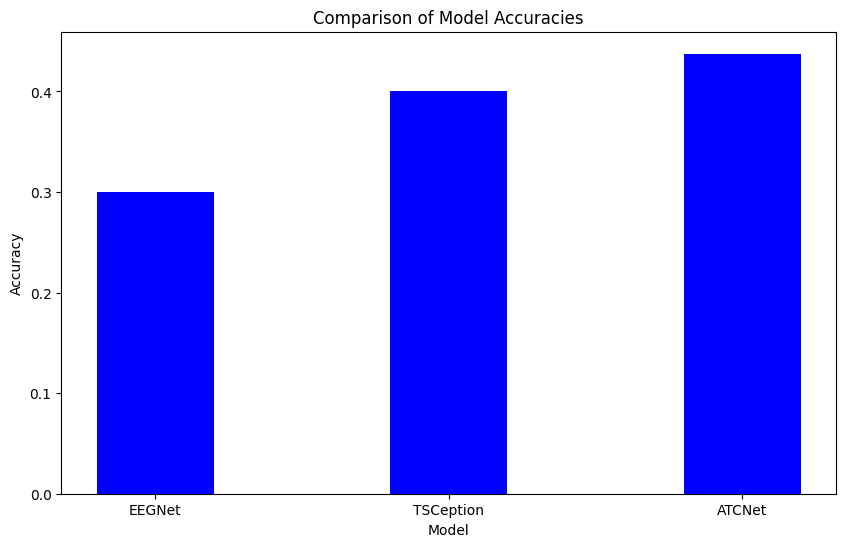

In [64]:
# Calculate the accuracy of each model
accuracy_eegnet = calculate_performance(model_eegnet, data_eegnet, labels_eegnet)[0]
accuracy_tsception = calculate_performance(model_tsception, data_tsception, labels_tsception)[0]
#accuracy_vit = calculate_performance(model_vit, data_vit, labels_vit)[0]
accuracy_atcnet = calculate_performance(model_atcnet, data_atcnet, labels_atcnet)[0]
#accuracy_vae = calculate_performance(model_vae, data_vae, labels_vae)[0]

# Create a list of model names and their corresponding accuracies
model_names = ["EEGNet", "TSCeption", "ATCNet"]
accuracies = [accuracy_eegnet, accuracy_tsception, accuracy_atcnet]

# Create a bar chart to compare model accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color="blue", width=0.4)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.show()


In [66]:
# Assuming 'accuracy_eegnet', 'accuracy_tsception', 'accuracy_vit', 'accuracy_atcnet', 'accuracy_vae' are already computed

# Create a dictionary to store accuracies
accuracies = {
    'EEGNet': accuracy_eegnet,
    'TSCeption': accuracy_tsception,
    'ATCNet': accuracy_atcnet
    }

# Find the model with the highest accuracy
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

# Print the best model and its accuracy
print(f"Best Model: {best_model}")
print(f"Accuracy: {best_accuracy}")


Best Model: ATCNet
Accuracy: 0.4375
